## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

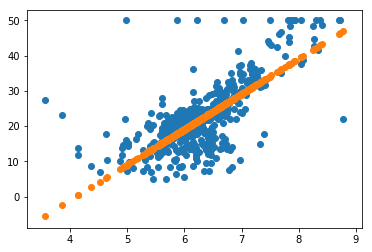

In [3]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random
data = load_boston()
X,y = data['data'], data['target']
X_rm = X[:,5]

def price(rm,k,b):
    return k*rm+b
def loss(y,y_hat):
    return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

try_times = 2000
min_loss= float('inf')
best_k, best_b = None,None
for i in range(try_times):
    k = random.random()*200-100
    b = random.random()*200-100
    price_by_random_k_and_b = [price(r,k,b) for r in X_rm]
    current_loss = loss(y, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
#         print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
price_by_random_k_and_b = [price(r,best_k,best_b) for r in X_rm]
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_by_random_k_and_b)

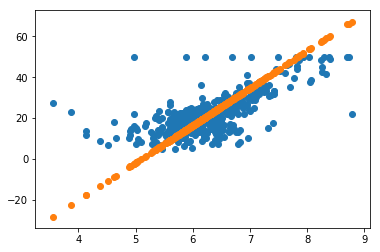

In [4]:

try_times = 2000
min_loss =float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
direction = [(1,1),
             (1,-1),
             (-1,1),
             (-1,-1)]
next_direction = random.choice(direction)
scalar = 0.1
for i in range(try_times):
    k_direction,b_direction = next_direction
    current_k,current_b = best_k+scalar*k_direction,best_b+ scalar*b_direction
    price_by_k_and_b = [price(r,current_k,current_b) for r in X_rm]
    current_loss = loss(y,price_by_k_and_b)
    if current_loss<min_loss:
        min_loss = current_loss
        best_k,best_b = current_k,current_b
        next_direction = next_direction
#         print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)
plt.figure(2)
price_by_k_and_b = [price(r,best_k,best_b) for r in X_rm]
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_by_k_and_b)
    

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

### ans: 广度优先是为了获取所有地铁线路的 url，并不是地铁线路的 url 只会在一个网页里出现，广度优先和深度优先这两种方法都可以实现，因为获取地铁的时候做了去重，感觉这两种方式是差不多的，只是某个地铁线路先爬取还是后爬取的

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

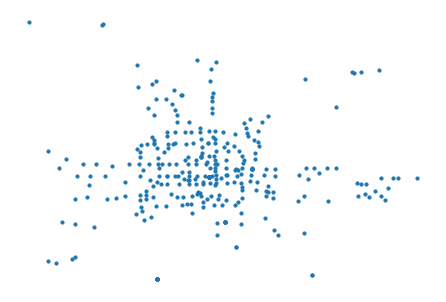

In [63]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import math
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


with open('station_2.csv','r') as f:
    location_cn = f.readlines()
    sub_stations = {}
    for sub in location_cn:
        sub_station = sub.strip().split(',')
        sub_stations[sub_station[0]] = sub_station[1:-1]

station_connection = defaultdict(list)    

for key,value in sub_stations.items():
    station_connection[value[0]].append(value[1].strip())
    station_connection[value[-1]].append(value[-2].strip())
    for index,station in enumerate(value[1:-1]):
        last_station = value[index].strip()
        station_connection[station].append(last_station)     
        next_station = value[index+2].strip()
        station_connection[station].append(next_station)

for key, value in station_connection.items():
    station_connection[key] = list(set(value))

        
with open('station_lati_1.csv','r') as f:
    stations_read = f.readlines()
    stations_location = {}
    for stations in stations_read:
        station = stations.strip().split(':')
        station_cn = station[0].split()[1]
        lati = tuple(map(float, station[1].split(',')))
        stations_location[station_cn] = lati
#         print(station_cn,lati)

cities = list(stations_location.keys())
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)
plt.figure(1)

stations_new = {}
for key, value in station_connection.items():
    stations_new[key] = stations_location[key]
cities = list(stations_new.keys())
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)   
nx.draw(city_graph, stations_new, with_labels=False, node_size=10)

station_connection_graph = nx.Graph(station_connection)

# plt.figure(2) # 我从高德地图获取的经纬度是不对的，所以我没画连接图
# nx.draw(station_connection_graph, stations_location, with_labels=True, node_size=10)


In [64]:
def search (station1,station2,connnection_grpah):
    pathes = [[station1]]
    vistied = set()
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in vistied: continue
        successors = connnection_grpah[froninter]
        for station in successors:
            if station in path:continue
            new_path = path + [station]
            pathes.append(new_path)
            if station == station2: return new_path
        vistied.add(froninter)       
def pretty_print(stations):
    print('->'.join(stations))
    
station1 = '天安门西站'
station2 = '奥体中心站'
stations = search(station1,station2,station_connection)
print(pretty_print(stations))

天安门西站->天安门东站->王府井站->金鱼胡同站->中国美术馆站->南锣鼓巷站->什刹海站->鼓楼大街站->安德里北街站->安华桥站->北土城站->奥体中心站
None


##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

In [65]:
def geo_distance(origin, destination):
   
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_station_distance(station1, station2):
    return geo_distance(stations_location[station1], stations_location[station2])


def search (station1,station2,connnection_grpah,sort_candidate):
    pathes = [[station1]]
    vistied = set()
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in vistied: continue
        successors = connnection_grpah[froninter]
        for station in successors:
            if station in path:continue
            new_path = path + [station]
            pathes.append(new_path)
            if station == station2: return new_path
        pathes = sort_candidate(pathes)
        vistied.add(froninter)       
        

def pretty_print(stations):
    print('>>'.join(stations))
    
def transfer_station_first(pathes):
    return sorted(pathes,key= len)


def get_path_distance(path):
    distance = 0
    for index,station in enumerate(path[:-1]):
        distance +=get_station_distance(station,path[index+1])
    return distance

def shortest_path_first(pathes):
    return sorted(pathes,key = get_path_distance)        

station1 = '天安门西站'
station2 = '奥体中心站'
# 最少换乘
stations = search(station1,station2,station_connection,sort_candidate=transfer_station_first)
print(pretty_print(stations))
# 最短距离
stations = search(station1,station2,station_connection,sort_candidate=shortest_path_first)
print(pretty_print(stations))

天安门西站>>天安门东站>>王府井站>>金鱼胡同站>>中国美术馆站>>南锣鼓巷站>>什刹海站>>鼓楼大街站>>安德里北街站>>安华桥站>>北土城站>>奥体中心站
None
天安门西站>>天安门东站>>王府井站>>东单站>>灯市口站>>东四站>>张自忠路站>>北新桥站>>雍和宫站>>安定门站>>鼓楼大街站>>安德里北街站>>安华桥站>>北土城站>>奥体中心站
None


In [69]:
def search_way(start,destination, by_way):
    if by_way =='C':
        stations = search(station1,station2,station_connection,sort_candidate=transfer_station_first)
        return pretty_print(stations)
    elif by_way =='D':
        stations = search(station1,station2,station_connection,sort_candidate=shortest_path_first)
        return pretty_print(stations)
    else: # 没有考虑综合
        return None

In [71]:
search_way(start='天安门西站',destination='奥体中心站', by_way ='D') 

天安门西站>>天安门东站>>王府井站>>东单站>>灯市口站>>东四站>>张自忠路站>>北新桥站>>雍和宫站>>安定门站>>鼓楼大街站>>安德里北街站>>安华桥站>>北土城站>>奥体中心站


##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


### 不一样，主要是因为获取的经纬度不对

恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)